In [2]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults() 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Markdown as md
from bs4 import BeautifulSoup
import unicodedata
import json
%matplotlib inline

In [3]:
data = pd.read_excel ('DEXI1.xlsx')
data.head(100)

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
0,2019-12,Apartment,2.37,79.33,64.09
1,2019-12,Holiday home,2.68,135.66,99.95
2,2019-12,Hostel,1.88,25.98,30.22
3,2019-12,Hotel,1.92,106.24,42.54
4,2019-11,Apartment,2.30,55.89,65.30
...,...,...,...,...,...
95,2018-01,Hotel,2.13,111.23,59.49
96,2017-12,Apartment,2.44,80.50,67.81
97,2017-12,Holiday home,2.82,135.18,98.98
98,2017-12,Hostel,1.90,24.44,30.59


In [4]:
data.shape

(116, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      116 non-null    object 
 1   Accommodation Type        116 non-null    object 
 2   StayedLengthofStay        116 non-null    float64
 3   StayedAverageDailyRate    116 non-null    float64
 4   BookingWindowCheckindate  116 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.7+ KB


In [6]:
data[50:95]

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
50,2018-12,Hostel,1.90,24.44,30.59
51,2018-12,Hotel,1.91,104.16,42.26
52,2018-11,Apartment,2.34,57.49,69.00
53,2018-11,Holiday home,2.39,94.19,106.20
54,2018-11,Hostel,1.92,20.40,33.49
55,2018-11,Hotel,1.84,85.00,43.16
56,2018-10,Apartment,2.50,63.23,61.51
57,2018-10,Holiday home,2.80,90.89,91.57
58,2018-10,Hostel,1.94,22.74,28.08
59,2018-10,Hotel,1.89,94.14,39.73


In [7]:
data.describe(include= "all")

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
count,116,116,116.000000,116.000000,116.000000
unique,29,4,NaN,NaN,NaN
top,2019-11,Hotel,NaN,NaN,NaN
freq,4,29,NaN,NaN,NaN
mean,NaN,NaN,2.468362,78.971466,52.222845
std,NaN,NaN,0.626048,36.880396,25.986935
min,NaN,NaN,1.830000,19.920000,17.030000
25%,NaN,NaN,1.920000,50.097500,33.407500
50%,NaN,NaN,2.255000,90.180000,43.160000
75%,NaN,NaN,2.905000,101.180000,65.927500


In [8]:
data = pd.read_excel('DEXI1.xlsx', na_values=['NA', 'N/A'])

In [9]:
data.describe()

,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
count,116.000000,116.000000,116.000000
mean,2.468362,78.971466,52.222845
std,0.626048,36.880396,25.986935
min,1.830000,19.920000,17.030000
25%,1.920000,50.097500,33.407500
50%,2.255000,90.180000,43.160000
75%,2.905000,101.180000,65.927500
max,3.840000,154.440000,124.550000


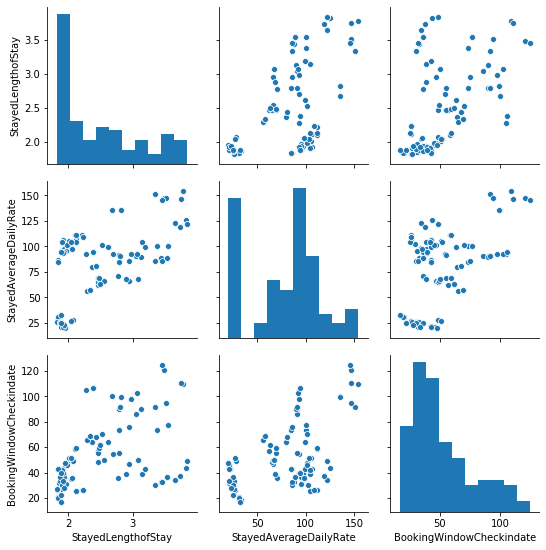

In [10]:
sb.pairplot(data[["StayedLengthofStay","StayedAverageDailyRate","BookingWindowCheckindate"]])

In [11]:
data.isna().sum()

Date                        0
Accommodation Type          0
StayedLengthofStay          0
StayedAverageDailyRate      0
BookingWindowCheckindate    0
dtype: int64

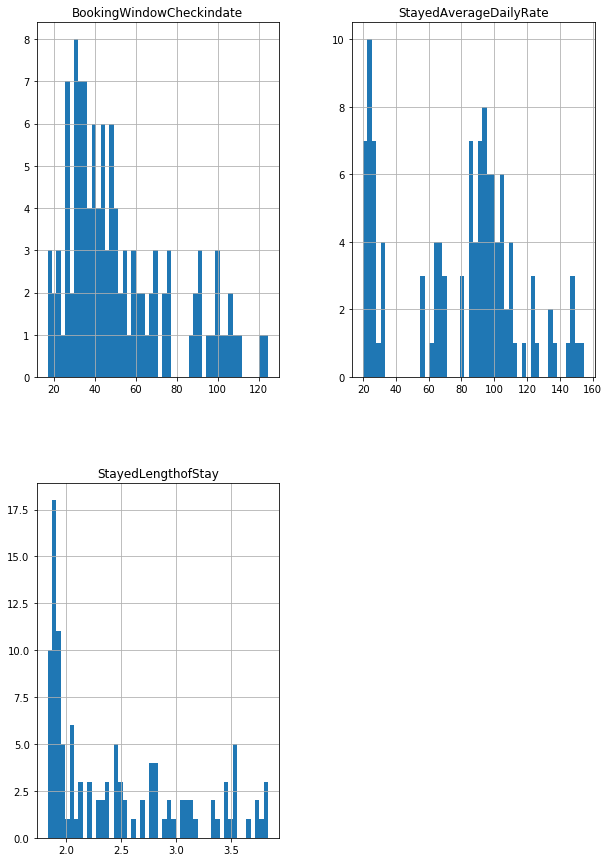

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(10,15))
plt.show()

In [13]:
np.random.seed(50)

In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)

93

In [16]:
len(test_set)

23

In [17]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 80 * test_ratio

In [19]:
data_with_id = data.reset_index() 
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")
test_set.head()

,index,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
11,11,2019-10,Hotel,1.89,95.37,38.66
35,35,2019-04,Hotel,1.94,96.92,38.77
51,51,2018-12,Hotel,1.91,104.16,42.26
52,52,2018-11,Apartment,2.34,57.49,69.00
62,62,2018-09,Hostel,1.89,24.63,22.36


In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.01, random_state=9)
test_set.head()

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
57,2018-10,Holiday home,2.80,90.89,91.57
3,2019-12,Hotel,1.92,106.24,42.54


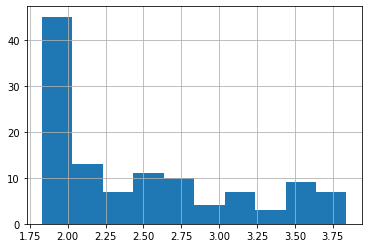

In [21]:
data["StayedLengthofStay"].hist()

In [22]:
data["BookingWindowCheckindate"] = pd.cut(data["StayedLengthofStay"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

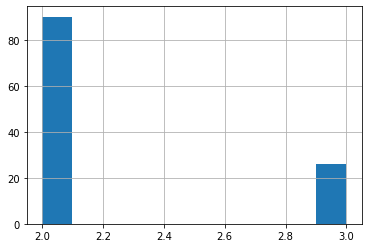

In [23]:
data["BookingWindowCheckindate"].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=4)
for train_index, test_index in split.split(data, data["BookingWindowCheckindate"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [25]:
strat_test_set["BookingWindowCheckindate"].value_counts() / len(strat_test_set)

2    0.791667
3    0.208333
5    0.000000
4    0.000000
1    0.000000
Name: BookingWindowCheckindate, dtype: float64

In [26]:
data["BookingWindowCheckindate"].value_counts() / len(data)

2    0.775862
3    0.224138
5    0.000000
4    0.000000
1    0.000000
Name: BookingWindowCheckindate, dtype: float64

In [27]:
def BookingWindowCheckindate_proportions(data):
    return data["BookingWindowCheckindate"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.1, random_state=3)

compare_props = pd.DataFrame({
    "Overall": BookingWindowCheckindate_proportions(data),
    "Stratified": BookingWindowCheckindate_proportions(strat_test_set),
    "Random": BookingWindowCheckindate_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"]
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"]
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000000,0.000000,0.00,NaN,NaN
2,0.775862,0.791667,0.75,96.666667,102.037037
3,0.224138,0.208333,0.25,111.538462,92.948718
4,0.000000,0.000000,0.00,NaN,NaN
5,0.000000,0.000000,0.00,NaN,NaN


In [28]:
data = strat_train_set.copy()

In [29]:
corr_matrix = data.corr()

In [30]:
corr_matrix["StayedAverageDailyRate"].sort_values(ascending=False)

StayedAverageDailyRate    1.00000
StayedLengthofStay        0.57357
Name: StayedAverageDailyRate, dtype: float64

NameError: name 'save_fig' is not defined

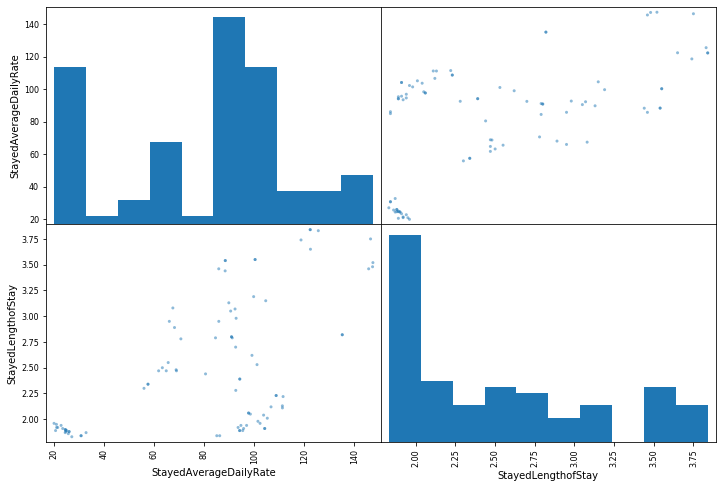

In [177]:
from pandas.plotting import scatter_matrix

attributes = ["StayedAverageDailyRate", "StayedLengthofStay"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [178]:
data.describe()

,StayedLengthofStay,StayedAverageDailyRate
count,92.000000,92.000000
mean,2.493478,80.739130
std,0.633142,35.276396
min,1.830000,19.920000
25%,1.917500,60.677500
50%,2.320000,91.040000
75%,2.950000,101.662500
max,3.840000,147.430000


In [41]:
data.notnull()

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate
14,True,True,True,True,True
15,True,True,True,True,True
65,True,True,True,True,True
80,True,True,True,True,True
10,True,True,True,True,True
...,...,...,...,...,...
23,True,True,True,True,True
95,True,True,True,True,True
105,True,True,True,True,True
38,True,True,True,True,True


In [48]:
data.loc[(data['Date'].isnull()) |
              (data['Accommodation Type'].isnull()) |
              (data['StayedAverageDailyRate'].isnull()) |
              (data['BookingWindowCheckindate'].isnull())]

,Date,Accommodation Type,StayedLengthofStay,StayedAverageDailyRate,BookingWindowCheckindate


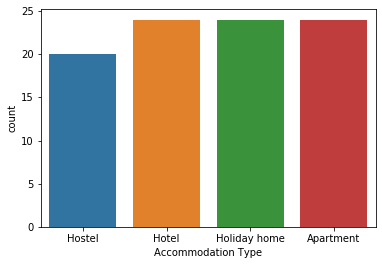

In [59]:
chart=sb.countplot('Accommodation Type',data=data,)
chart.set_xticklabels(chart.get_xticklabels())
plt.show()

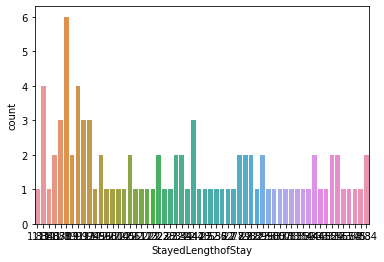

In [65]:
chart=sb.countplot('StayedLengthofStay',data=data,)
chart.set_xticklabels(chart.get_xticklabels())
plt.show()

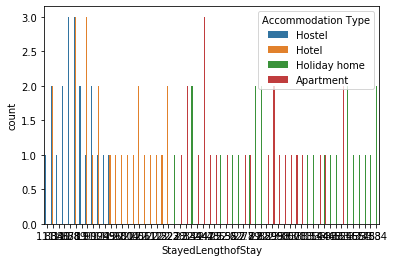

In [67]:
sb.countplot('StayedLengthofStay',hue='Accommodation Type',data=data)
plt.show()

In [69]:
import json
data.to_json('datacustbeh.json')